In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import numpy as np

In [3]:
model = tf.keras.models.load_model('Model/keras2_model.h5')

In [4]:
# Load the test data
test_data = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
        'dataset/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 1511 images belonging to 3 classes.


In [5]:
# Predict the outputs
predictions = model.predict(test_data)


48/48 [==============================] - 9s 193ms/step


In [6]:
predictions

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [9.4649859e-25, 2.3531360e-34, 1.0000000e+00],
       ...,
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [7.6255794e-32, 0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [7]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_data)

print('Testing Accuracy: ', accuracy)

48/48 [==============================] - 9s 188ms/step - loss: 0.0216 - accuracy: 0.9987
Testing Accuracy:  0.9986763596534729


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [9]:
y_pred = model.predict(test_data)
y_pred = np.argmax(y_pred, axis=1)


48/48 [==============================] - 9s 189ms/step


In [10]:
# Get the true labels of the test data
y_true = test_data.classes

In [11]:
# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[175, 169, 161],
       [168, 169, 165],
       [160, 166, 178]], dtype=int64)

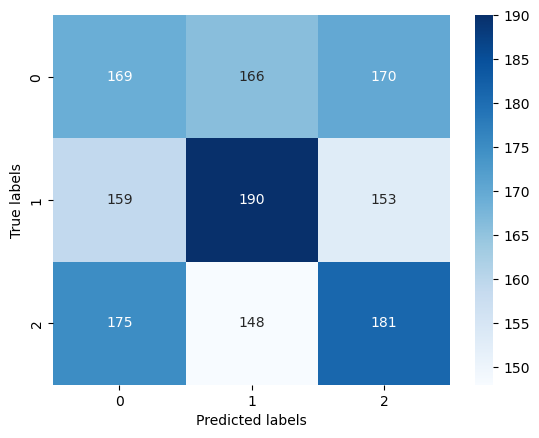

In [11]:

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()